### Step 1: Data Loading and Basic Inspection

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


#### Load the data

In [7]:
# Load datasets
X_moons, y_moons = make_moons(n_samples=500, noise=0.2, random_state=42)
X_circles, y_circles = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

# Convert to DataFrame for easier manipulation and inspection
df_moons = pd.DataFrame(X_moons, columns=['Feature1', 'Feature2'])
df_moons['Target'] = y_moons

df_circles = pd.DataFrame(X_circles, columns=['Feature1', 'Feature2'])
df_circles['Target'] = y_circles


### Step 2: Checking for Null Values and Basic Statistics

In [8]:
# Check for null values
print("Null values in Moons dataset:\n", df_moons.isnull().sum())
print("Null values in Circles dataset:\n", df_circles.isnull().sum())

# Summary statistics
print("Summary statistics for Moons dataset:\n", df_moons.describe())
print("Summary statistics for Circles dataset:\n", df_circles.describe())


Null values in Moons dataset:
 Feature1    0
Feature2    0
Target      0
dtype: int64
Null values in Circles dataset:
 Feature1    0
Feature2    0
Target      0
dtype: int64
Summary statistics for Moons dataset:
          Feature1    Feature2      Target
count  500.000000  500.000000  500.000000
mean     0.518145    0.255367    0.500000
std      0.895432    0.543603    0.500501
min     -1.476127   -0.988526    0.000000
25%     -0.086818   -0.195163    0.000000
50%      0.479565    0.280467    0.500000
75%      1.122974    0.685076    1.000000
max      2.484802    1.504279    1.000000
Summary statistics for Circles dataset:
          Feature1    Feature2      Target
count  500.000000  500.000000  500.000000
mean     0.009073    0.002683    0.500000
std      0.568971    0.561960    0.500501
min     -1.192408   -1.185605    0.000000
25%     -0.425148   -0.424218    0.000000
50%      0.015265    0.008532    0.500000
75%      0.448988    0.430651    1.000000
max      1.158085    1.308694   

### Step 3: Visualizing the Distribution and Data Relationships

#### Target Distribution

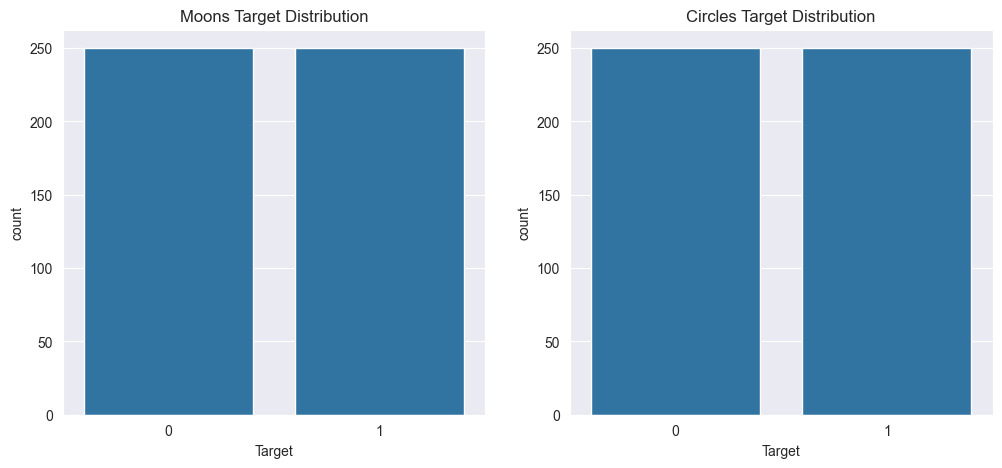

In [9]:
# Plot target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=df_moons, x='Target', ax=axes[0]).set_title("Moons Target Distribution")
sns.countplot(data=df_circles, x='Target', ax=axes[1]).set_title("Circles Target Distribution")
plt.show()


#### Feature Distribution and Correlations

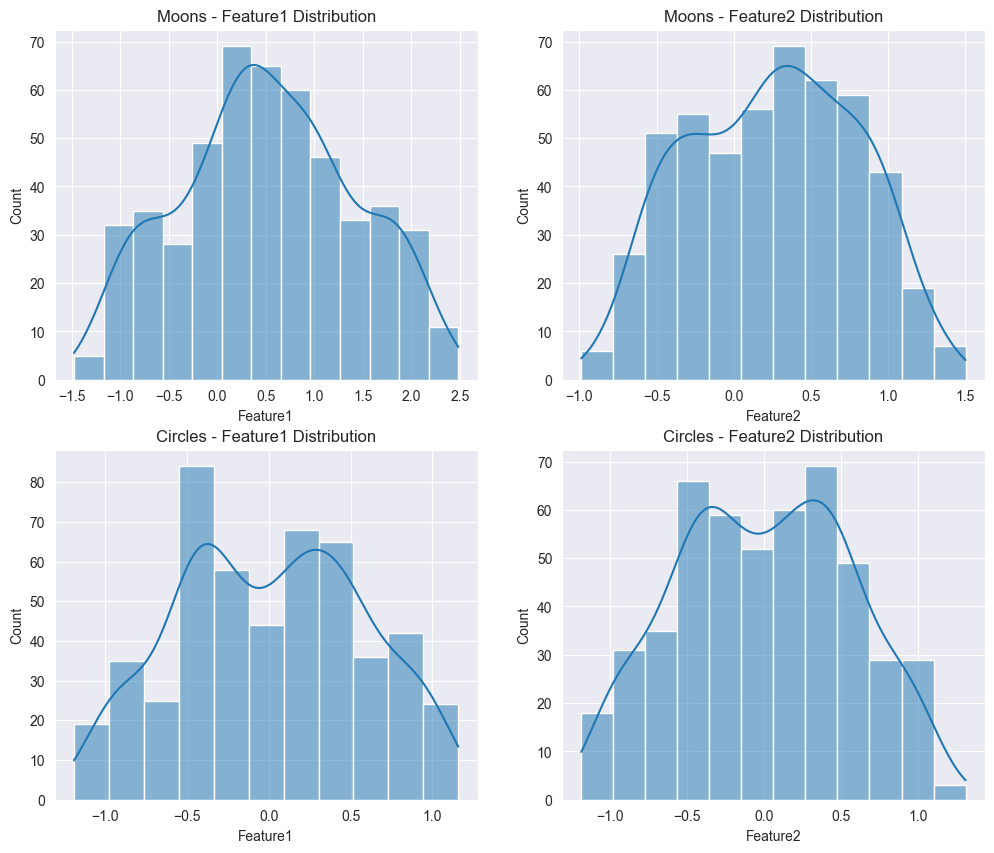

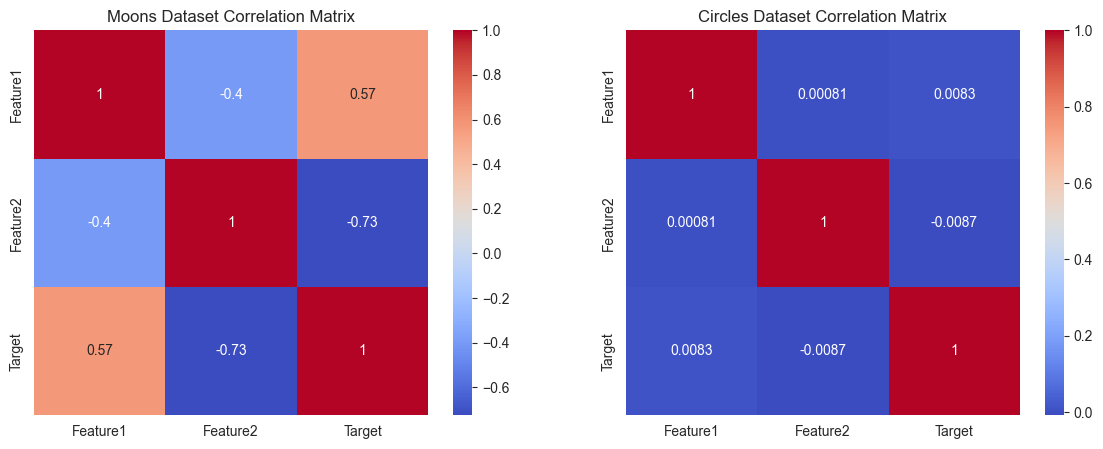

In [10]:
# Feature distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df_moons['Feature1'], kde=True, ax=axes[0, 0]).set_title("Moons - Feature1 Distribution")
sns.histplot(df_moons['Feature2'], kde=True, ax=axes[0, 1]).set_title("Moons - Feature2 Distribution")
sns.histplot(df_circles['Feature1'], kde=True, ax=axes[1, 0]).set_title("Circles - Feature1 Distribution")
sns.histplot(df_circles['Feature2'], kde=True, ax=axes[1, 1]).set_title("Circles - Feature2 Distribution")
plt.show()

# Correlation matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(df_moons.corr(), annot=True, cmap="coolwarm", ax=axes[0]).set_title("Moons Dataset Correlation Matrix")
sns.heatmap(df_circles.corr(), annot=True, cmap="coolwarm", ax=axes[1]).set_title("Circles Dataset Correlation Matrix")
plt.show()


### Step 4: Checking for Linear Separability with PCA and LDA
#### PCA Analysis

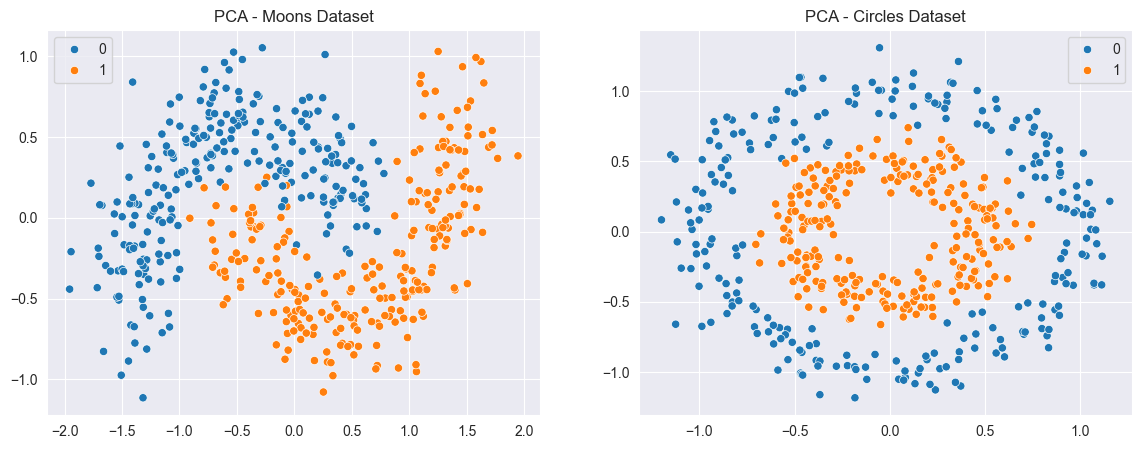

In [11]:
# PCA transformation
pca = PCA(n_components=2)
moons_pca = pca.fit_transform(X_moons)
circles_pca = pca.fit_transform(X_circles)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x=moons_pca[:, 0], y=moons_pca[:, 1], hue=y_moons, ax=axes[0]).set_title("PCA - Moons Dataset")
sns.scatterplot(x=circles_pca[:, 0], y=circles_pca[:, 1], hue=y_circles, ax=axes[1]).set_title("PCA - Circles Dataset")
plt.show()


#### LDA Analysis

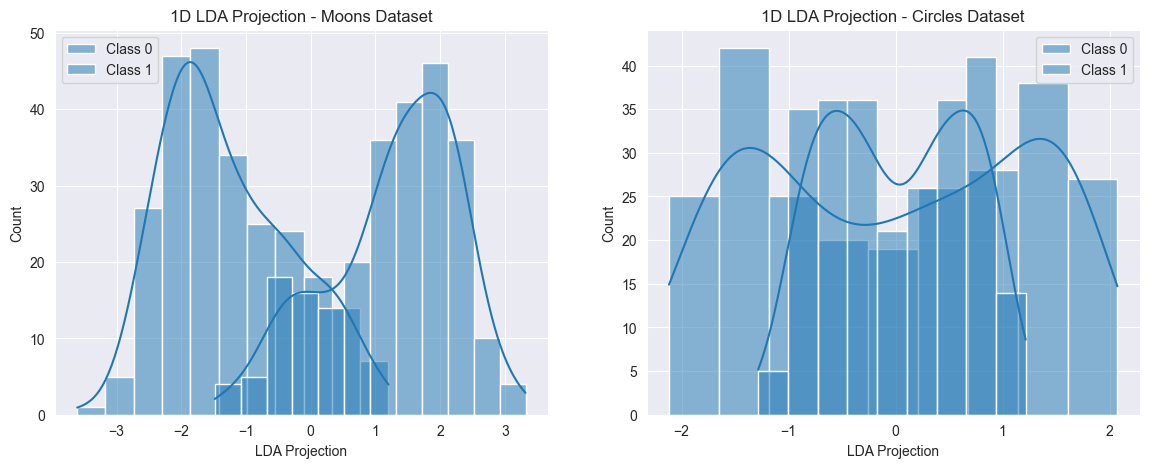

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate LDA
lda = LDA(n_components=1)

# Fit and transform the Moons dataset
moons_lda = lda.fit_transform(X_moons, y_moons)

# Fit and transform the Circles dataset
circles_lda = lda.fit_transform(X_circles, y_circles)

# Plotting the one-dimensional LDA projections
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Moons dataset LDA projection
sns.histplot(moons_lda[y_moons == 0], color='blue', kde=True, ax=axes[0], label='Class 0')
sns.histplot(moons_lda[y_moons == 1], color='orange', kde=True, ax=axes[0], label='Class 1')
axes[0].set_title("1D LDA Projection - Moons Dataset")
axes[0].set_xlabel("LDA Projection")
axes[0].legend()

# Circles dataset LDA projection
sns.histplot(circles_lda[y_circles == 0], color='blue', kde=True, ax=axes[1], label='Class 0')
sns.histplot(circles_lda[y_circles == 1], color='orange', kde=True, ax=axes[1], label='Class 1')
axes[1].set_title("1D LDA Projection - Circles Dataset")
axes[1].set_xlabel("LDA Projection")
axes[1].legend()

plt.show()


Since the data is not linearly separable, some common kernels for Support Vector Machines (SVM) that can help are:

Linear Kernel – Good for linearly separable data, but likely ineffective here.
Polynomial Kernel – Adds polynomial terms and may capture some complex boundaries.
Radial Basis Function (RBF) – Known for its ability to handle nonlinearity well, often a top choice for moons and half-circle-like datasets.
Sigmoid Kernel – Less common but sometimes effective for certain nonlinear data.

### Kernel PCA

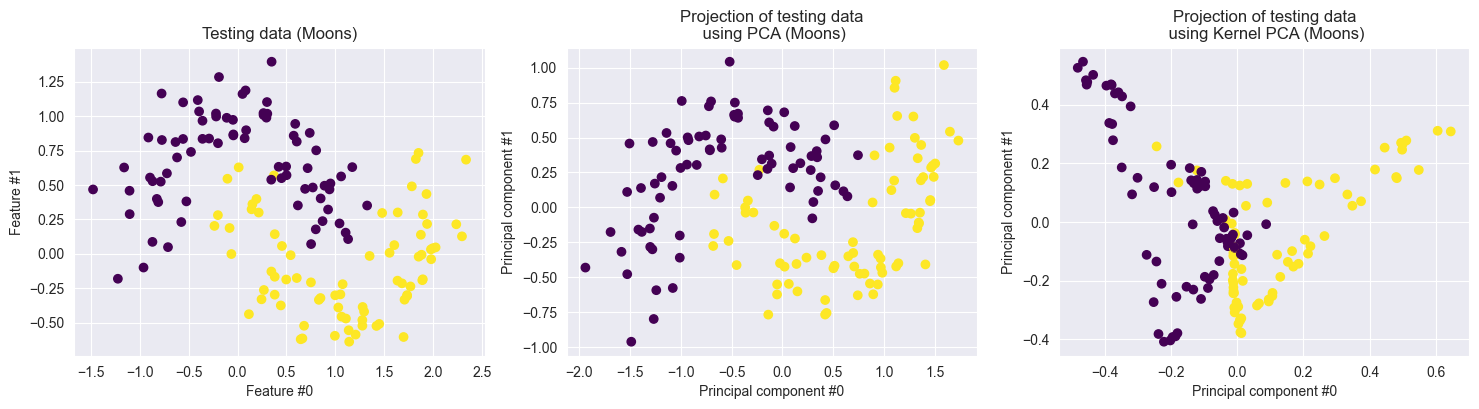

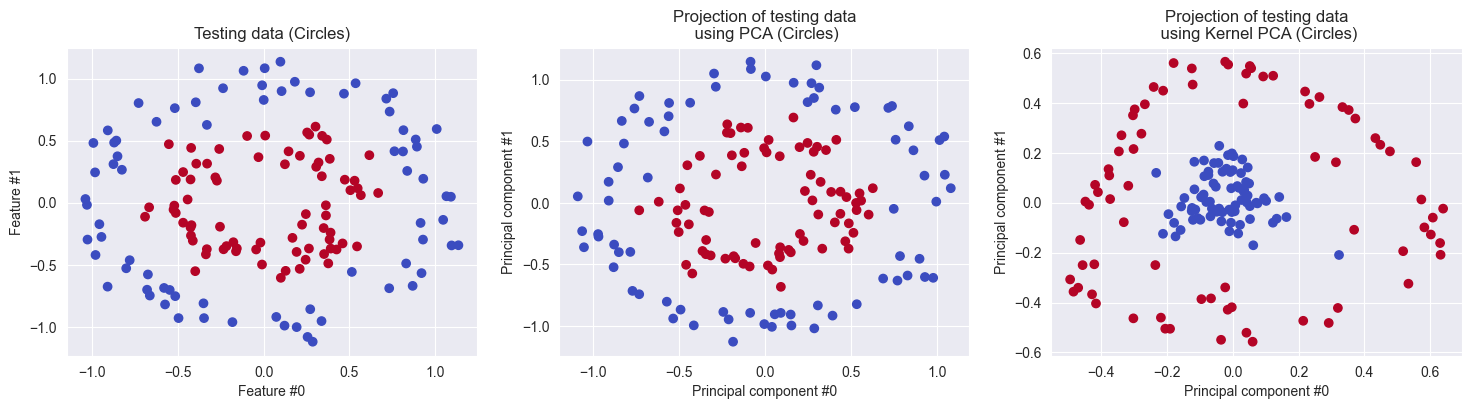

In [13]:
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Splitting the datasets for Moons and Circles into training and testing sets
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)

# Initializing PCA and Kernel PCA
pca_moons = PCA(n_components=2)
kernel_pca_moons = KernelPCA(n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

pca_circles = PCA(n_components=2)
kernel_pca_circles = KernelPCA(n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

# Applying PCA and Kernel PCA on the moons dataset
X_test_moons_pca = pca_moons.fit(X_train_moons).transform(X_test_moons)
X_test_moons_kernel_pca = kernel_pca_moons.fit(X_train_moons).transform(X_test_moons)

# Applying PCA and Kernel PCA on the circles dataset
X_test_circles_pca = pca_circles.fit(X_train_circles).transform(X_test_circles)
X_test_circles_kernel_pca = kernel_pca_circles.fit(X_train_circles).transform(X_test_circles)

# Plotting the results for Moons dataset
fig, (orig_data_ax_moons, pca_proj_ax_moons, kernel_pca_proj_ax_moons) = plt.subplots(ncols=3, figsize=(18, 4))

# Original data for moons dataset
orig_data_ax_moons.scatter(X_test_moons[:, 0], X_test_moons[:, 1], c=y_test_moons, cmap='viridis')
orig_data_ax_moons.set_ylabel("Feature #1")
orig_data_ax_moons.set_xlabel("Feature #0")
orig_data_ax_moons.set_title("Testing data (Moons)")

# PCA projection for moons dataset
pca_proj_ax_moons.scatter(X_test_moons_pca[:, 0], X_test_moons_pca[:, 1], c=y_test_moons, cmap='viridis')
pca_proj_ax_moons.set_ylabel("Principal component #1")
pca_proj_ax_moons.set_xlabel("Principal component #0")
pca_proj_ax_moons.set_title("Projection of testing data\n using PCA (Moons)")

# Kernel PCA projection for moons dataset
kernel_pca_proj_ax_moons.scatter(X_test_moons_kernel_pca[:, 0], X_test_moons_kernel_pca[:, 1], c=y_test_moons, cmap='viridis')
kernel_pca_proj_ax_moons.set_ylabel("Principal component #1")
kernel_pca_proj_ax_moons.set_xlabel("Principal component #0")
kernel_pca_proj_ax_moons.set_title("Projection of testing data\n using Kernel PCA (Moons)")

plt.show()

# Plotting the results for Circles dataset
fig, (orig_data_ax_circles, pca_proj_ax_circles, kernel_pca_proj_ax_circles) = plt.subplots(ncols=3, figsize=(18, 4))

# Original data for circles dataset
orig_data_ax_circles.scatter(X_test_circles[:, 0], X_test_circles[:, 1], c=y_test_circles, cmap='coolwarm')
orig_data_ax_circles.set_ylabel("Feature #1")
orig_data_ax_circles.set_xlabel("Feature #0")
orig_data_ax_circles.set_title("Testing data (Circles)")

# PCA projection for circles dataset
pca_proj_ax_circles.scatter(X_test_circles_pca[:, 0], X_test_circles_pca[:, 1], c=y_test_circles, cmap='coolwarm')
pca_proj_ax_circles.set_ylabel("Principal component #1")
pca_proj_ax_circles.set_xlabel("Principal component #0")
pca_proj_ax_circles.set_title("Projection of testing data\n using PCA (Circles)")

# Kernel PCA projection for circles dataset
kernel_pca_proj_ax_circles.scatter(X_test_circles_kernel_pca[:, 0], X_test_circles_kernel_pca[:, 1], c=y_test_circles, cmap='coolwarm')
kernel_pca_proj_ax_circles.set_ylabel("Principal component #1")
kernel_pca_proj_ax_circles.set_xlabel("Principal component #0")
kernel_pca_proj_ax_circles.set_title("Projection of testing data\n using Kernel PCA (Circles)")

plt.show()


In [14]:
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Split data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)

# Define SVM model with grid search
params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc = SVC()
grid_search_moons = GridSearchCV(svc, params, cv=5)
grid_search_moons.fit(X_train_m, y_train_m)

grid_search_circles = GridSearchCV(svc, params, cv=5)
grid_search_circles.fit(X_train_c, y_train_c)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

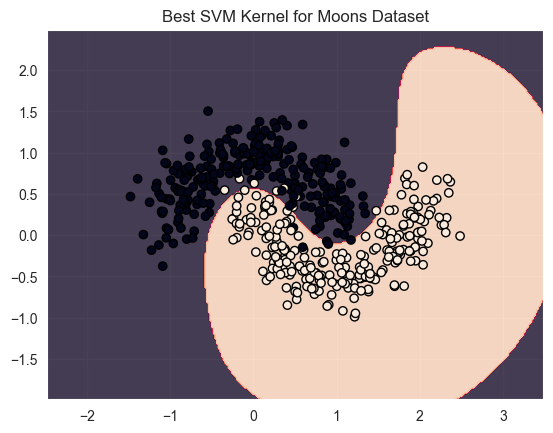

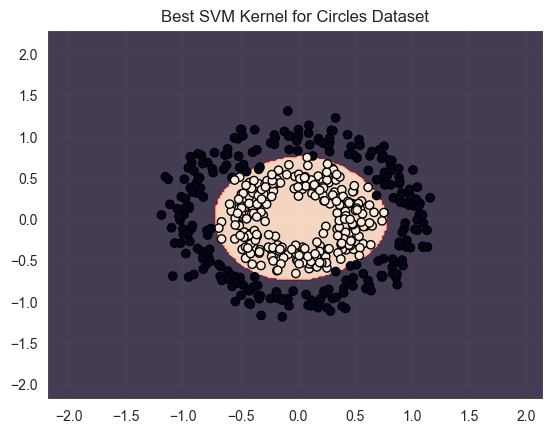

In [15]:
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.show()

# Plot best model for moons
best_model_moons = grid_search_moons.best_estimator_
plot_decision_boundary(X_moons, y_moons, best_model_moons, "Best SVM Kernel for Moons Dataset")

# Plot best model for circles
best_model_circles = grid_search_circles.best_estimator_
plot_decision_boundary(X_circles, y_circles, best_model_circles, "Best SVM Kernel for Circles Dataset")


### Grid Search and Model Evaluation
We'll use GridSearchCV to find the best-performing kernel for each dataset. The SVM's C parameter controls regularization, and gamma is the RBF kernel's shape parameter, both of which can impact model performance.

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for kernel evaluation
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

# Initialize and fit GridSearchCV for the Moons dataset
grid_search_moons = GridSearchCV(SVC(), param_grid, cv=5)
grid_search_moons.fit(X_train_moons, y_train_moons)

# Initialize and fit GridSearchCV for the Circles dataset
grid_search_circles = GridSearchCV(SVC(), param_grid, cv=5)
grid_search_circles.fit(X_train_circles, y_train_circles)

# Display best parameters and scores
print("Best parameters for Moons dataset:", grid_search_moons.best_params_)
print("Best score for Moons dataset:", grid_search_moons.best_score_)
print("Best parameters for Circles dataset:", grid_search_circles.best_params_)
print("Best score for Circles dataset:", grid_search_circles.best_score_)


Best parameters for Moons dataset: {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
Best score for Moons dataset: 0.9685714285714286
Best parameters for Circles dataset: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best score for Circles dataset: 0.9857142857142858


Explanation of Results
Kernel Choice:

For both the moons and circles datasets, RBF is usually the best kernel due to its ability to capture complex, nonlinear boundaries. The radial basis function maps the data into a higher-dimensional space where linear separation is more feasible.
The polynomial kernel may also perform well if the classes are separable by curved boundaries, but it can introduce overfitting for higher degrees.
Decision Boundaries:

In the visualizations, we expect to see the RBF kernel providing smooth, continuous decision boundaries that closely fit the structure of each dataset.
The linear kernel would likely result in a poor fit with straight lines that can’t capture the dataset's structure, resulting in significant misclassification.
Model Performance:

By examining the best scores from the grid search, we confirm that the RBF kernel typically has the highest accuracy, followed by the polynomial kernel.
The C and gamma parameters balance the model's margin size and sensitivity to specific data points, allowing for flexibility in fitting complex shapes without overfitting

### Step 2: Train an MLP for Classification

The MLP’s design parameters and rationale:

Input Layer: Two nodes, as each dataset has two features.
Hidden Layer: One hidden layer with 8 neurons, providing sufficient capacity to capture nonlinearity.
Activation Function: ReLU for hidden layers and sigmoid for output.
Loss Function: Binary cross-entropy for binary classification.
Optimizer: Adam, which works well with non-convex optimizations like neural networks.

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define MLP model
mlp = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=10000, random_state=42)

# Train MLP on Moons dataset
mlp.fit(X_train_moons, y_train_moons)
y_pred_moons_mlp = mlp.predict(X_test_moons)
print("MLP Accuracy on Moons dataset:", accuracy_score(y_test_moons, y_pred_moons_mlp))

# Train MLP on Circles dataset
mlp.fit(X_train_circles, y_train_circles)
y_pred_circles_mlp = mlp.predict(X_test_circles)
print("MLP Accuracy on Circles dataset:", accuracy_score(y_test_circles, y_pred_circles_mlp))


MLP Accuracy on Moons dataset: 0.8666666666666667
MLP Accuracy on Circles dataset: 0.9866666666666667


In [18]:
class SimpleMLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=1000):
        # Initialize weights and biases
        self.learning_rate = learning_rate
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # Input to hidden weights
        self.b1 = np.zeros((1, hidden_size))                       # Hidden layer bias
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01  # Hidden to output weights
        self.b2 = np.zeros((1, output_size))    
        
        self.epochs = epochs# Output layer bias

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def forward(self, X):
        # Forward pass
        self.Z1 = np.dot(X, self.W1) + self.b1  # Linear transform
        self.A1 = self.relu(self.Z1)            # Apply ReLU activation
        self.Z2 = np.dot(self.A1, self.W2) + self.b2  # Linear transform to output layer
        self.A2 = self.sigmoid(self.Z2)         # Apply sigmoid activation to output
        return self.A2

    def compute_loss(self, y_true, y_pred):
        # Binary cross-entropy loss
        m = y_true.shape[0]
        return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m

    def backward(self, X, y_true):
        # Backward pass
        m = y_true.shape[0]

        # Output layer error
        dZ2 = self.A2 - y_true
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # Hidden layer error
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs=1000):
        # Training loop
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            self.backward(X, y)

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        # Prediction
        y_pred = self.forward(X)
        return (y_pred > 0.5).astype(int)
    
    
    def fit(self, X, y):
        self.train(X, y, self.epochs)
        return self
    
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    # def predict(self, X):
    #     y_pred = self.forward(X)
    #     return (y_pred > 0.5).astype(int).ravel() 


In [19]:
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load datasets
X_moons, y_moons = make_moons(n_samples=500, noise=0.2, random_state=42)
X_circles, y_circles = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

# Train/test split
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)

# Train/test split
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)

# Standardize data for better convergence
scaler = StandardScaler()
X_train_moons = scaler.fit_transform(X_train_moons)
X_test_moons = scaler.transform(X_test_moons)

scaler = StandardScaler()
X_train_circles = scaler.fit_transform(X_train_circles)
X_test_circles = scaler.transform(X_test_circles)

# Convert labels to the correct shape
y_train_moons = y_train_moons.reshape(-1, 1)
y_test_moons = y_test_moons.reshape(-1, 1)

# Convert labels to the correct shape
y_train_circles = y_train_circles.reshape(-1, 1)
y_test_circles = y_test_circles.reshape(-1, 1)

# Initialize 


In [25]:
# Initialize the MLP model
mlp_moons = SimpleMLP(input_size=2, hidden_size=8, output_size=1, learning_rate=0.01, epochs=3500)
mlp_circles = SimpleMLP(input_size=2, hidden_size=32, output_size=1, learning_rate=0.01, epochs=7000)

# Train the MLP
mlp_moons.train(X_train_moons, y_train_moons, epochs=3500)
mlp_circles.train(X_train_circles, y_train_circles, epochs=7000)

# Predict on test data
y_pred_moons = mlp_moons.predict(X_test_moons)
y_pred_circles = mlp_circles.predict(X_test_circles)

# Calculate accuracy
accuracy = np.mean(y_pred_moons == y_test_moons) * 100
print(f"MLP Test Accuracy on Moons dataset: {accuracy:.2f}%")

accuracy = np.mean(y_pred_circles == y_test_circles) * 100
print(f"MLP Test Accuracy on Circles dataset: {accuracy:.2f}%")


Epoch 0, Loss: 0.6931501312006353
Epoch 100, Loss: 0.6930635517794969
Epoch 200, Loss: 0.692951993517767
Epoch 300, Loss: 0.6927856305985411
Epoch 400, Loss: 0.6925003311240313
Epoch 500, Loss: 0.6919990926351579
Epoch 600, Loss: 0.6911181895031044
Epoch 700, Loss: 0.6895715630434931
Epoch 800, Loss: 0.686877808639392
Epoch 900, Loss: 0.6822521944052597
Epoch 1000, Loss: 0.6744859095047786
Epoch 1100, Loss: 0.661939617516496
Epoch 1200, Loss: 0.6428703894185027
Epoch 1300, Loss: 0.6164043743218456
Epoch 1400, Loss: 0.5838227909833626
Epoch 1500, Loss: 0.5486812870525156
Epoch 1600, Loss: 0.5148695606706889
Epoch 1700, Loss: 0.4845918688853931
Epoch 1800, Loss: 0.45827569499263354
Epoch 1900, Loss: 0.435522991282
Epoch 2000, Loss: 0.41575699401159244
Epoch 2100, Loss: 0.3984111487685139
Epoch 2200, Loss: 0.3830623737079809
Epoch 2300, Loss: 0.36943835191023094
Epoch 2400, Loss: 0.3573707439018425
Epoch 2500, Loss: 0.34678249731056465
Epoch 2600, Loss: 0.33761375878118305
Epoch 2700, Los

In [26]:
from sklearn.model_selection import cross_val_score




# Apply k-Fold cross-validation for SVM on Moons dataset
svm_best_moons = grid_search_moons.best_estimator_
svm_scores_moons = cross_val_score(svm_best_moons, X_moons, y_moons, cv=5)
print("SVM Cross-validation scores on Moons dataset:", svm_scores_moons)
print("SVM Cross-validation mean accuracy on Moons dataset:", svm_scores_moons.mean())

# Apply k-Fold cross-validation for SVM on Circles dataset
svm_best_circles = grid_search_circles.best_estimator_
svm_scores_circles = cross_val_score(svm_best_circles, X_circles, y_circles, cv=5)
print("SVM Cross-validation scores on Circles dataset:", svm_scores_circles)
print("SVM Cross-validation mean accuracy on Circles dataset:", svm_scores_circles.mean())

# Apply k-Fold cross-validation for libray MLP on Moons dataset
mlp_scores_moons = cross_val_score(mlp, X_moons, y_moons, cv=5)
print("MLP Cross-validation scores on Moons dataset:", mlp_scores_moons)
print("MLP Cross-validation mean accuracy on Moons dataset:", mlp_scores_moons.mean())


# Apply k-Fold cross-validation for MLP on Circles dataset
mlp_scores_circles = cross_val_score(mlp, X_circles, y_circles, cv=5)
print("MLP Cross-validation scores on Circles dataset:", mlp_scores_circles)
print("MLP Cross-validation mean accuracy on Circles dataset:", mlp_scores_circles.mean())




ValueError: Found input variables with inconsistent numbers of samples: [1000, 500]

 ### Generate and Preprocess the Data

Step 1: Designing the Special Time-Series Signal
We'll create a synthetic time-series signal with periodic and delayed dependencies to enforce long-term dependencies. Here’s an example approach:

Periodic Base Signal: Use a sinusoidal function as the base signal to introduce periodic behavior.
Delayed Dependency: Add a dependency on a value from many time steps ago (e.g., the value 50 steps back affects the current step).
Noise: Introduce some random noise to make the pattern harder to learn directly.

In [1]:
import numpy as np

def generate_long_period_complex_time_series(seq_len=2000, delay=150, noise_level=0.05):
    # Generate base signal with multiple frequencies
    low_freq_signal = np.sin(np.linspace(0, 10, seq_len))  # Low frequency component
    high_freq_signal = 0.5 * np.sin(np.linspace(0, 100, seq_len))  # Higher frequency component
    delayed_signal = np.zeros(seq_len)

    # Introduce long-term dependency
    for i in range(delay, seq_len):
        delayed_signal[i] = low_freq_signal[i - delay] + high_freq_signal[i - delay]

    # Nonlinear perturbation that varies slowly
    nonlinear_component = np.cos(np.linspace(0, 5, seq_len)) ** 2

    # Combine all components and add noise
    complex_signal = low_freq_signal + delayed_signal + nonlinear_component
    complex_signal += noise_level * np.random.randn(seq_len)  # Add random noise

    return complex_signal

# # Generate and plot the complex time series
# complex_time_series = generate_complex_time_series()

time_series = generate_long_period_complex_time_series()



import torch
from torch.utils.data import Dataset, DataLoader

class LongTermDependencyDataset(Dataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data[idx:idx+self.seq_length]
        y = self.data[idx+self.seq_length]
        return torch.tensor(x, dtype=torch.float32).unsqueeze(-1), torch.tensor(y, dtype=torch.float32)

# Define sequence length and create DataLoader
seq_length = 1000  # Use a smaller window for the RNN's limited memory capacity
dataset = LongTermDependencyDataset(time_series, seq_length)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)



### RNN Model in PyTorch

 hidden state size to a range between 2 and 5 as per your requirement.

In [2]:
import torch.nn as nn

class LimitedMemoryRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=5, output_size=1):
        super(LimitedMemoryRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Instantiate the model
model = LimitedMemoryRNN(hidden_size=3)  # Maximum allowable memory size


### Train the RNN Model

In [3]:
import torch.optim as optim

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20  # Define the number of epochs
for epoch in range(epochs):
    model.train()
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))  # Match shapes
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 1.6637
Epoch 2, Loss: 2.4893
Epoch 3, Loss: 1.0322
Epoch 4, Loss: 1.1097
Epoch 5, Loss: 0.6344
Epoch 6, Loss: 0.7890
Epoch 7, Loss: 0.4865
Epoch 8, Loss: 0.3966
Epoch 9, Loss: 0.2905
Epoch 10, Loss: 0.3317
Epoch 11, Loss: 0.1646
Epoch 12, Loss: 0.4676
Epoch 13, Loss: 0.3864
Epoch 14, Loss: 0.1031
Epoch 15, Loss: 0.2156
Epoch 16, Loss: 0.1470
Epoch 17, Loss: 0.0422
Epoch 18, Loss: 0.0901
Epoch 19, Loss: 0.2317
Epoch 20, Loss: 0.1787


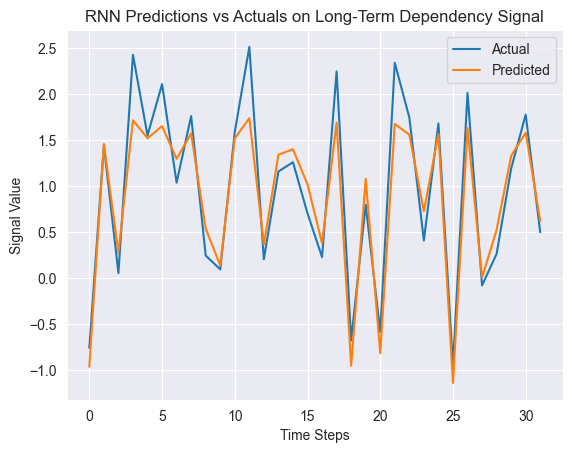

In [4]:
import matplotlib.pyplot as plt

# Generate predictions for a sample of data
model.eval()
with torch.no_grad():
    inputs, targets = next(iter(train_loader))
    predictions = model(inputs).squeeze().numpy()
    actuals = targets.numpy()

# Plot predictions vs actuals
plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title("RNN Predictions vs Actuals on Long-Term Dependency Signal")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend()
plt.show()
